# import necessary files for training 

In [1]:
from keras.datasets import boston_housing
from keras import models,layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# read and pretrain data

In [2]:
(train_data,train_target),(test_data,test_target) = boston_housing.load_data()

# data normalisation

In [3]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

# create model for train and compile model with Specific optimizer and lost function

In [4]:
def bulid_model():
    model= models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64,activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer= 'rmsprop',loss = 'mse',metrics = ['mae'])
    return model

# k-fold Validation

In [5]:
k = 4 
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_history = []
for i in range(k):
    print('processing fold {}'.format(i+1))
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_target = train_target[i * num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i+1) * num_val_samples:]], axis = 0)
    partial_train_target = np.concatenate([train_target[:i * num_val_samples],train_target[(i+1) * num_val_samples:]], axis = 0)
    model = bulid_model()
    history = model.fit(partial_train_data,partial_train_target,epochs=num_epochs,batch_size=1 ,verbose = 0 )
    mae_history = history.history['mean_absolute_error']
    all_mae_history.append(mae_history)

processing fold 1
processing fold 2
processing fold 3
processing fold 4


In [6]:
avrage_mae_history = [
    np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

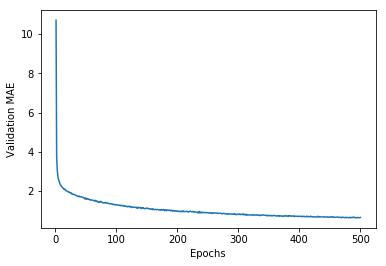

In [7]:
plt.plot(range(1,len(avrage_mae_history)+1),avrage_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# fit model for train 

In [10]:
model = bulid_model()
history = model.fit(train_data,train_target,epochs=400,batch_size=16 ,verbose = 0 )
test_mse_score , test_mae_score = model.evaluate(test_data,test_target)


102/102 [==============================] - 0s 3ms/step


# test_mse_score

In [20]:
print('test_mse_score='+ str(round(test_mse_score,2)))

test_mse_score=13.7


In [ ]:
#github.com/aidinze